In [99]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.manifold import TSNE

For FileName  pca_a.txt


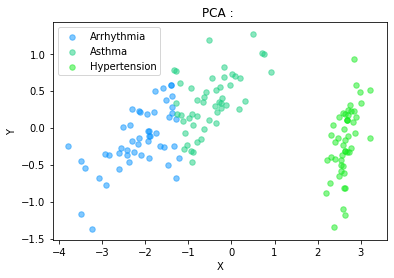

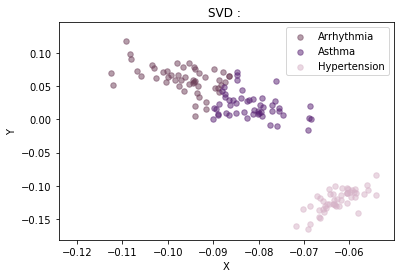

(150, 2)


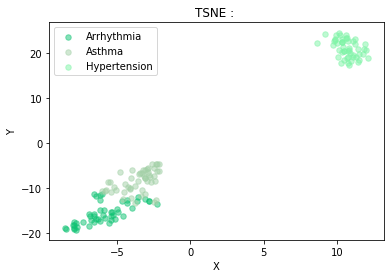

For FileName  pca_b.txt


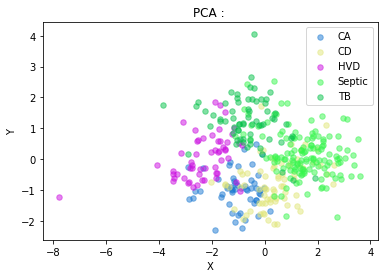

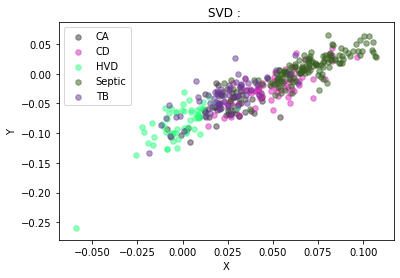

(386, 2)


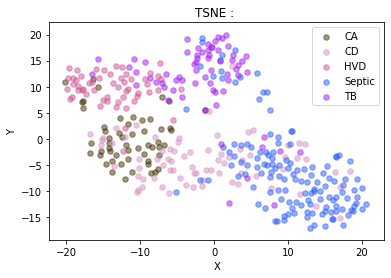

For FileName  pca_c.txt


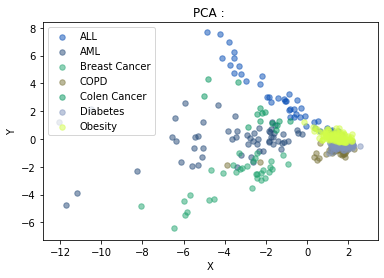

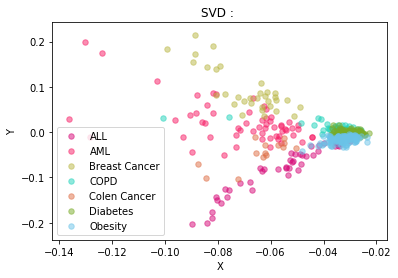

(428, 2)


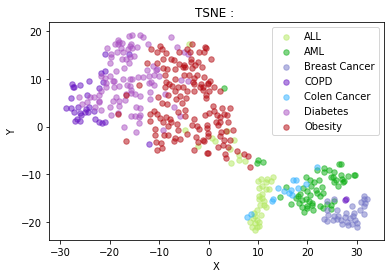

In [108]:

def getAttributes(data):
    # since last attribute is the attribute name, no need to consider it
    #print(data.shape)
    values = data[:,0:data.shape[1]-1]
    values = np.array(values, dtype=float)
    attriuteNames = data[:,data.shape[1]-1:data.shape[1]]
    #print(attriuteNames)
    return values,attriuteNames

def getNormalizedAttributes(values):
    #print("HHH")
    mean = np.mean(values, axis=0)
    mean = np.array(mean)
    #print(mean)
    #print(mean.shape)
    #print(values.shape)
    #print("NEW Values")
    newValues = np.subtract(values,mean)
    covariance_values = np.dot(np.transpose(newValues), newValues)/newValues.shape[0]
    w,v = np.linalg.eig(covariance_values)
    #print(w)
    #print(v)
    #print(v[:,0:2])
    greater_eigenVectors = v[:,0:2]
    normalized_coordinates = np.dot(newValues,greater_eigenVectors)
    #print("Normalized Attributes")
    #print(normalized_coordinates)
    return normalized_coordinates

def drawScatterPlot(normalized_coordinates, attributeNames,title,xLabel,yLabel):
    #print("Draw Scatter Plot")
    x = normalized_coordinates[:,0:1]
    y = normalized_coordinates[:,1:2]
    #print("X")
    #print(x)
    #print("Y")
    #print(y)
    unique_attributes = np.unique(attributeNames)
    #print(unique_attributes)
    #colors = (0,0,1)
    number_of_colors = len(unique_attributes)
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    #print(colors)
    attributes_colors_map = dict(zip(unique_attributes,colors))
    #print(attributes_colors_map)
    for key in attributes_colors_map:
        X = []
        Y = []
        for i in range(len(attributeNames)):
            if attributeNames[i] == key:
                X.append(x[i])
                Y.append(y[i])                    
        plt.scatter(X, Y, s=30, c=attributes_colors_map[key], alpha=0.5,label=key)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend()
    plt.show()
    

def drawSVD(values, attributeNames):
    u, s, vh = np.linalg.svd(values, full_matrices=True)
    drawScatterPlot(u,attributeNames, "SVD : ", "X", "Y")

def drawTSNE(values, attributeNames):
    X_embedded = TSNE(n_components=2).fit_transform(values)
    #print("Shape of TSNE")
    print(X_embedded.shape)
    drawScatterPlot(X_embedded,attributeNames, "TSNE : ", "X", "Y")

def drawPCA(values, attributeNames):    
    normalized_coordinates = getNormalizedAttributes(values)
    drawScatterPlot(normalized_coordinates, attributeNames, "PCA : ", "X", "Y")
    
def readFile(filePath):
    data = []
    with open(filePath) as fp:
        line = fp.readline()
        while line:
            #print(line)
            data.append(line.replace("\n","").split("\t"))
            line = fp.readline()
            
    rawData = np.array(data)
    values,attributeNames = getAttributes(rawData)
    print("For FileName ", filePath)
    drawPCA(values, attributeNames)
    drawSVD(values, attributeNames)
    drawTSNE(values, attributeNames)
    
    
def main():
    readFile("pca_a.txt")
    readFile("pca_b.txt")
    readFile("pca_c.txt")

main()